In [327]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import autoreload
import missingno as msno
import csv
import os
import sys

from matplotlib import dates as mplDate
from collections import defaultdict, Counter

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

%matplotlib inline
%reload_ext autoreload
%autoreload 2

sb.set()
sb.set_style("darkgrid")
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 1000)

In [352]:
#dParser = lambda x: pd.to_datetime.strptime(x, "%Y-%m-%d %I-%p")
df = pd.read_csv("D:\Open Classroom\Data Files\GameStop Stock Prices\GME_stock.csv")#, index_col="date") #, parse_dates = dParser)
df.dropna(axis = "index", how = "any", inplace = True)
round(df.head(), -1)

,date,open_price,high_price,low_price,close_price,volume,adjclose_price
0,2021-01-28,260.0,480.0,110.0,190.0,58815800.0,190.0
1,2021-01-27,350.0,380.0,250.0,350.0,93396700.0,350.0
2,2021-01-26,90.0,150.0,80.0,150.0,178588000.0,150.0
3,2021-01-25,100.0,160.0,60.0,80.0,177874000.0,80.0
4,2021-01-22,40.0,80.0,40.0,70.0,196784300.0,70.0


In [310]:
df["date"] = pd.to_datetime(df["date"])
df.loc[0, "date"]

Timestamp('2021-01-28 00:00:00')

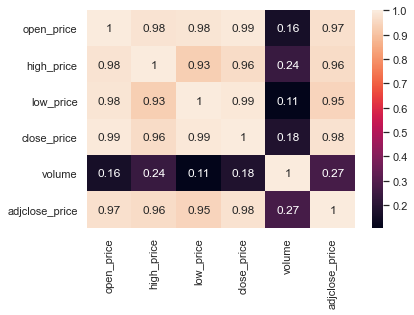

In [311]:
sb.heatmap(df.corr(), annot = True)

In [312]:
df["day"] = df["date"].dt.day_name()
df.head()

,date,open_price,high_price,low_price,close_price,volume,adjclose_price,day
0,2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006,Thursday
1,2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010,Wednesday
2,2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996,Tuesday
3,2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001,Monday
4,2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002,Friday


In [313]:
df["year"] = pd.DatetimeIndex(df["date"]).year
df.head()

,date,open_price,high_price,low_price,close_price,volume,adjclose_price,day,year
0,2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006,Thursday,2021
1,2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010,Wednesday,2021
2,2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996,Tuesday,2021
3,2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001,Monday,2021
4,2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002,Friday,2021


In [314]:
df["month_name"] = pd.DatetimeIndex(df["date"]).month_name()
df.head()
df["month"] = pd.DatetimeIndex(df["date"]).month
df.head()

,date,open_price,high_price,low_price,close_price,volume,adjclose_price,day,year,month_name,month
0,2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006,Thursday,2021,January,1
1,2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010,Wednesday,2021,January,1
2,2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996,Tuesday,2021,January,1
3,2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001,Monday,2021,January,1
4,2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002,Friday,2021,January,1


In [315]:
df.set_index(df["date"], inplace = True)
df.head()

,date,open_price,high_price,low_price,close_price,volume,adjclose_price,day,year,month_name,month
date,,,,,,,,,,,
2021-01-28,2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006,Thursday,2021,January,1
2021-01-27,2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010,Wednesday,2021,January,1
2021-01-26,2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996,Tuesday,2021,January,1
2021-01-25,2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001,Monday,2021,January,1
2021-01-22,2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002,Friday,2021,January,1


In [316]:
df.drop(columns = ["date"], inplace = True)
df.head()

,open_price,high_price,low_price,close_price,volume,adjclose_price,day,year,month_name,month
date,,,,,,,,,,
2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006,Thursday,2021,January,1
2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010,Wednesday,2021,January,1
2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996,Tuesday,2021,January,1
2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001,Monday,2021,January,1
2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002,Friday,2021,January,1


In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4773 entries, 2021-01-28 to 2002-02-13
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   open_price      4773 non-null   float64
 1   high_price      4773 non-null   float64
 2   low_price       4773 non-null   float64
 3   close_price     4773 non-null   float64
 4   volume          4773 non-null   float64
 5   adjclose_price  4773 non-null   float64
 6   day             4773 non-null   object 
 7   year            4773 non-null   int64  
 8   month_name      4773 non-null   object 
 9   month           4773 non-null   int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 410.2+ KB


In [318]:
df.isnull().sum()

open_price        0
high_price        0
low_price         0
close_price       0
volume            0
adjclose_price    0
day               0
year              0
month_name        0
month             0
dtype: int64

Text(0.5, 1.0, 'Stock Trade Per Day')

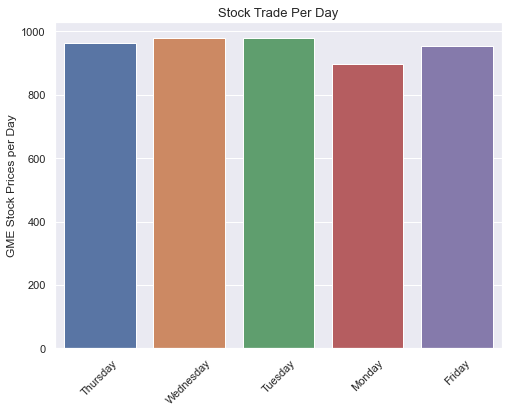

In [319]:
plt.figure(figsize = (8, 6))
sb.countplot(x = df["day"], data = df)
plt.xticks(rotation = 45)
plt.ylabel(ylabel = "GME Stock Prices per Day")
plt.xlabel(xlabel = None)
plt.title("Stock Trade Per Day", fontsize = (13))

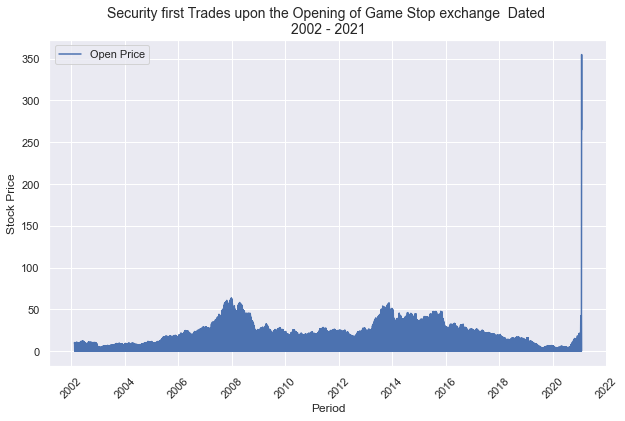

In [320]:
plt.figure(figsize = (10, 6))
trade_day = df["open_price"].resample("d").sum()#.plot()
sb.lineplot(x = trade_day.index, y = trade_day.values, label = "Open Price")#, data = trade_day)
plt.xticks(rotation = 45)
plt.xlabel("Period")
plt.ylabel("Stock Price")
plt.title("Security first Trades upon the Opening of Game Stop exchange  Dated \n2002 - 2021", fontsize = (14))
plt.legend(loc = "best")

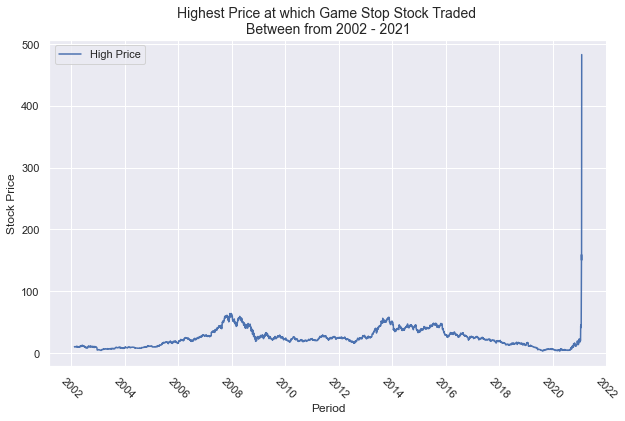

In [321]:
plt.figure(figsize = (10, 6))
high_price = df["high_price"].resample("h").max()
sb.lineplot(x = high_price.index, y = high_price.values, label = "High Price")
plt.xticks(rotation = -45)
plt.xlabel("Period")
plt.ylabel("Stock Price")
plt.title("Highest Price at which Game Stop Stock Traded \nBetween from 2002 - 2021", fontsize = (14))
plt.legend(loc = "best")

Text(0.5, 1.0, 'Lowest Price at which Game Stop Stock Traded \nBetween from 2002 - 2021')

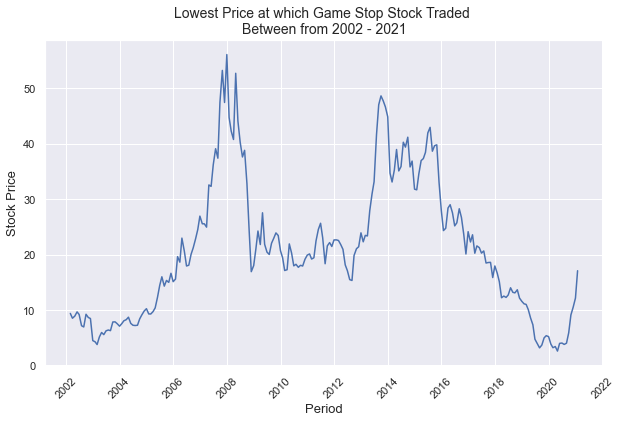

In [322]:
plt.figure(figsize = (10, 6))
low_price = df["low_price"].resample("bm").min()#.plot()
sb.lineplot(x = low_price.index, y = low_price.values)
plt.xticks(rotation = 45)
plt.xlabel(xlabel = "Period", fontsize = (13))
plt.ylabel(ylabel = "Stock Price", fontsize = (13))
plt.title("Lowest Price at which Game Stop Stock Traded \nBetween from 2002 - 2021", fontsize = (14))

Text(0.5, 1.0, 'Stock’s Closing Price that determines how Game Stop shares performed \nBetween from 2002 - 2021')

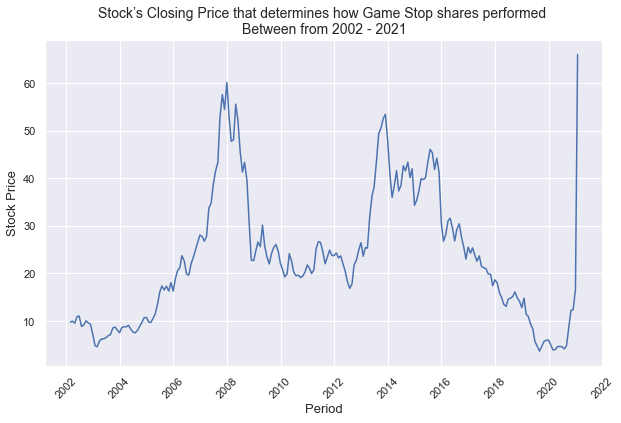

In [343]:
plt.figure(figsize = (10, 6))
close_price = df["close_price"].resample("bm").mean()#.plot()
sb.lineplot(x = close_price.index, y = close_price.values)
plt.xticks(rotation = 45)
plt.xlabel(xlabel = "Period", fontsize = (13))
plt.ylabel(ylabel = "Stock Price", fontsize = (13))
plt.title("Stock’s Closing Price that determines how Game Stop shares performed \nBetween from 2002 - 2021", fontsize = (14))

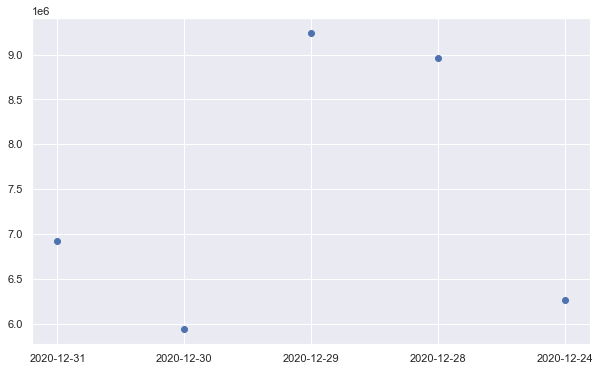

In [374]:
df2 = df.reset_index()
df2.drop(columns = ["index"], inplace = True)
df2.head()


date_filt = df2["date"] < "2021"
filt_df = round(df2[date_filt].head(), 2)
filt_df.head()

plt.figure(figsize = (10, 6))
plt.plot_date(x = filt_df["date"], y = filt_df["volume"])
plt.show()

In [342]:
X = df[["year"]]#.to_numpy() # Predictor Variables
y = df["open_price"] # Target (Independent Variable)

#le = LabelEncoder()
#month = le.fit_transform(X)

model = DecisionTreeClassifier()
model.fit(X, y)

ValueError: Unknown label type: 'continuous'